In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
import re

# Load datasets with specified encoding

merged_df = pd.read_csv('New_Merged.csv')

merged_df = merged_df.dropna()


# Create lag features
lags = [1, 2, 3]
parameters = ['pH (units)', 'Ammonia (mg/L)', 'Nitrate (mg/L)', 'Inorganic Phosphate (mg/L)', 'BOD (mg/l)', 'Dissolved Oxygen (mg/l)', 'Total coliforms (MPN/100ml)']

for parameter in parameters:
    for lag in lags:
        merged_df[f'{parameter}_lag_{lag}'] = merged_df[parameter].shift(lag)

# Drop rows with NaN values resulting from lag feature creation
merged_df.dropna(inplace=True)




# Select relevant columns for normalization
cols_to_normalize = parameters + ['Temperature', 'Dew Point', 'Humidity', 'Wind Speed', 'Pressure', 'Precip.']

# Normalize the selected columns
scaler = StandardScaler()
merged_df[cols_to_normalize] = scaler.fit_transform(merged_df[cols_to_normalize])

# Define and fit the SARIMA model for each parameter
sarima_order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

models = {}
forecasts = {}

for parameter in parameters:
    model = SARIMAX(merged_df[parameter], order=sarima_order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    forecast = model_fit.forecast(steps=1)
    models[parameter] = model_fit
    forecasts[parameter] = forecast

# Print the forecasts
for parameter, forecast in forecasts.items():
    print(f"Forecast for {parameter}:")
    print(forecast)

merged_df.columns


E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored 

Forecast for pH (units):
655   -1.902259
dtype: float64
Forecast for Ammonia (mg/L):
655   -0.121987
dtype: float64
Forecast for Nitrate (mg/L):
655    0.870798
dtype: float64
Forecast for Inorganic Phosphate (mg/L):
655   -0.400862
dtype: float64
Forecast for BOD (mg/l):
655   -0.584849
dtype: float64
Forecast for Dissolved Oxygen (mg/l):
655   -0.125312
dtype: float64
Forecast for Total coliforms (MPN/100ml):
655    1.319919
dtype: float64


E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Index(['Monitoring Stations', 'Month', 'Year', 'pH (units)', 'Ammonia (mg/L)',
       'Nitrate (mg/L)', 'Inorganic Phosphate (mg/L)', 'BOD (mg/l)',
       'Dissolved Oxygen (mg/l)', 'Total coliforms (MPN/100ml)',
       'Phytoplankton (cells/ml)', 'Wind', 'Condition', 'Day', 'Time',
       'Temperature', 'Dew Point', 'Humidity', 'Wind Speed', 'Wind Gust',
       'Pressure', 'Precip.', 'Date', 'pH (units)_lag_1', 'pH (units)_lag_2',
       'pH (units)_lag_3', 'Ammonia (mg/L)_lag_1', 'Ammonia (mg/L)_lag_2',
       'Ammonia (mg/L)_lag_3', 'Nitrate (mg/L)_lag_1', 'Nitrate (mg/L)_lag_2',
       'Nitrate (mg/L)_lag_3', 'Inorganic Phosphate (mg/L)_lag_1',
       'Inorganic Phosphate (mg/L)_lag_2', 'Inorganic Phosphate (mg/L)_lag_3',
       'BOD (mg/l)_lag_1', 'BOD (mg/l)_lag_2', 'BOD (mg/l)_lag_3',
       'Dissolved Oxygen (mg/l)_lag_1', 'Dissolved Oxygen (mg/l)_lag_2',
       'Dissolved Oxygen (mg/l)_lag_3', 'Total coliforms (MPN/100ml)_lag_1',
       'Total coliforms (MPN/100ml)_lag_2',
   

E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
E:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
E:\Anaconda\Lib\site-packages\statsmodels

Forecast for pH (units):
658    7.415974
659    7.387021
660    7.485805
661    7.404444
662    7.428552
663    7.312045
664    7.406400
665    7.419810
666    7.354035
667    7.494601
668    7.409902
669    7.401165
Name: predicted_mean, dtype: float64
Forecast for Ammonia (mg/L):
658    0.047062
659    0.022937
660    0.036890
661    0.058004
662    0.028244
663    0.027488
664    0.054569
665    0.022827
666    0.044704
667    0.048204
668    0.032539
669    0.065742
Name: predicted_mean, dtype: float64
Forecast for Nitrate (mg/L):
658    0.454621
659    0.339356
660    0.391406
661    0.340581
662    0.398380
663    0.362457
664    0.364445
665    0.387429
666    0.431019
667    0.424049
668    0.385078
669    0.427398
Name: predicted_mean, dtype: float64
Forecast for Inorganic Phosphate (mg/L):
658    0.098486
659    0.087317
660    0.098191
661    0.097970
662    0.097017
663    0.099897
664    0.116224
665    0.095279
666    0.090654
667    0.113999
668    0.130851
669    0.1107

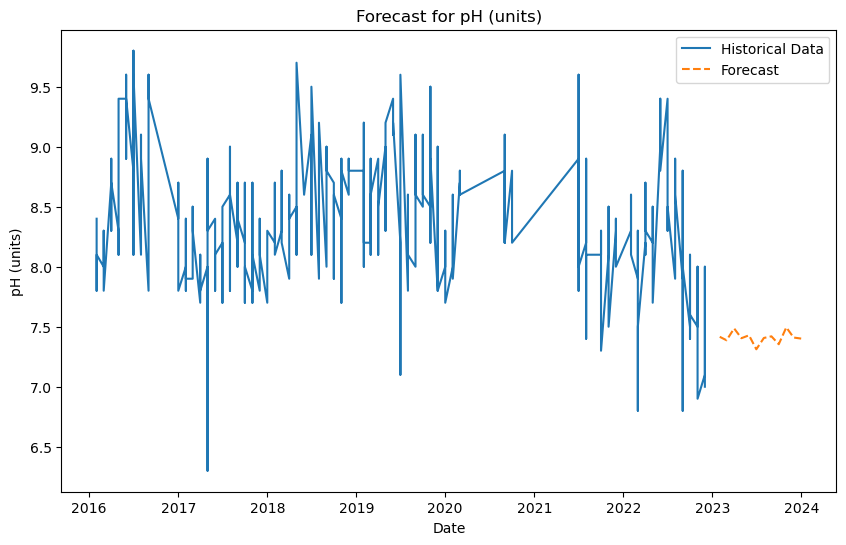

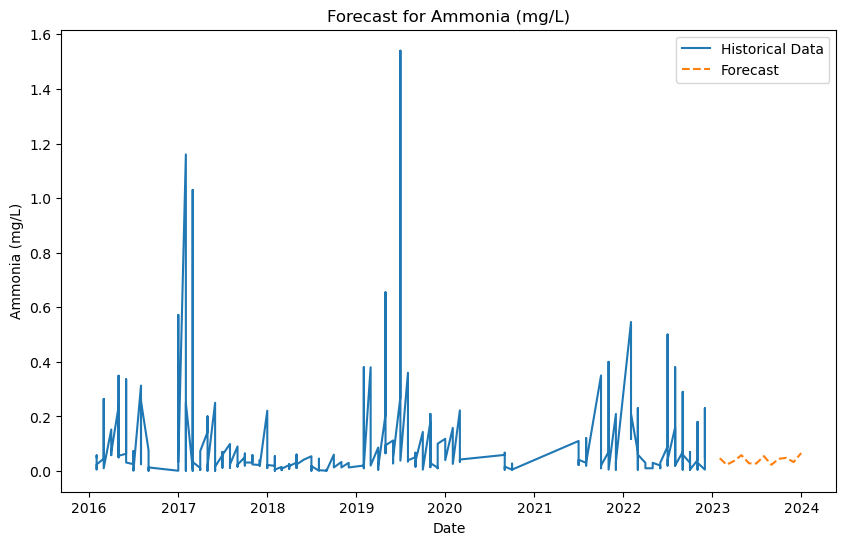

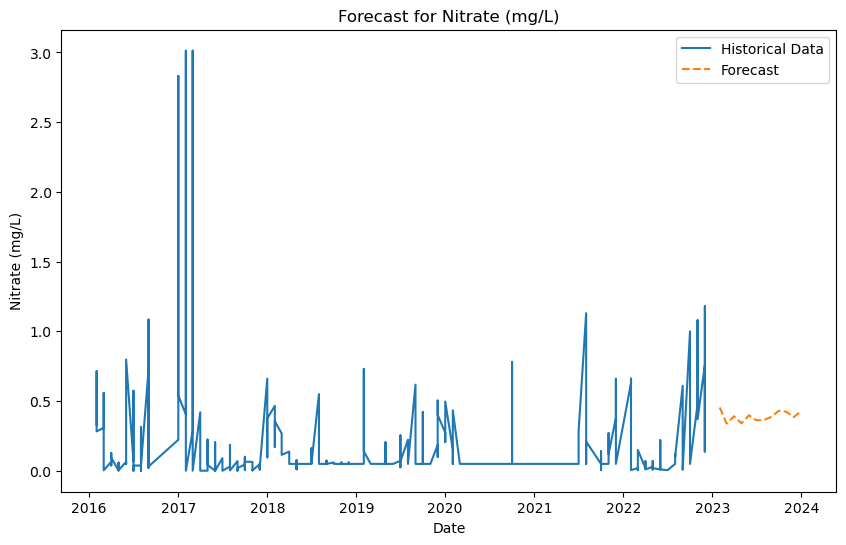

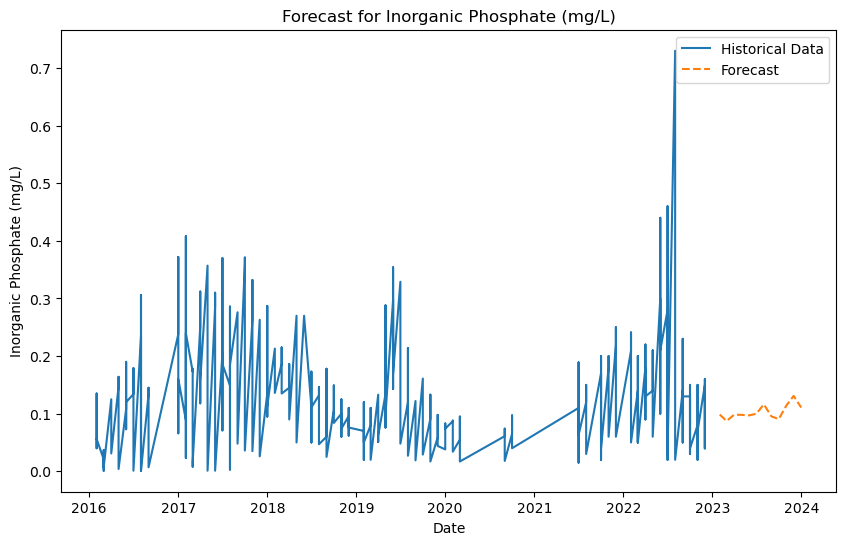

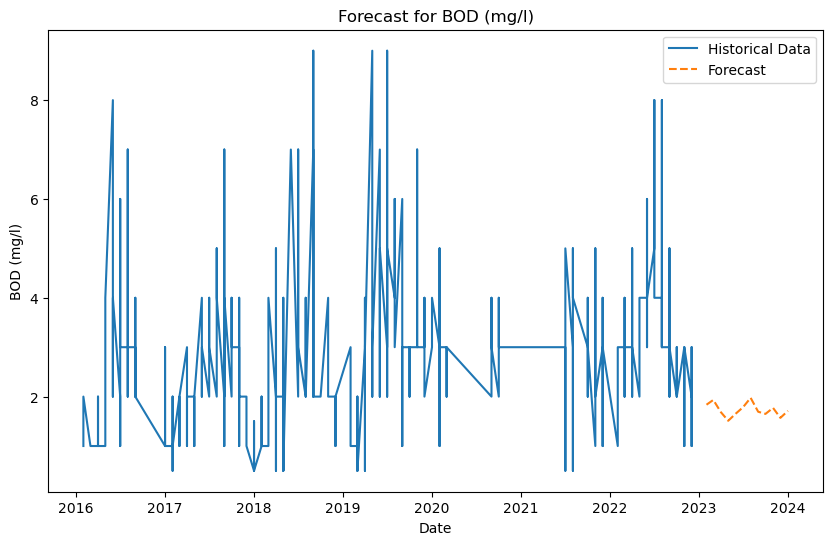

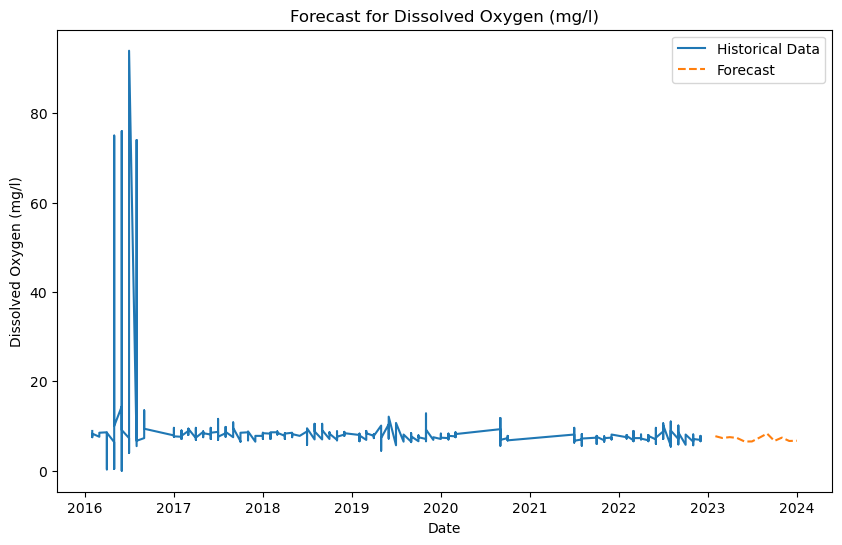

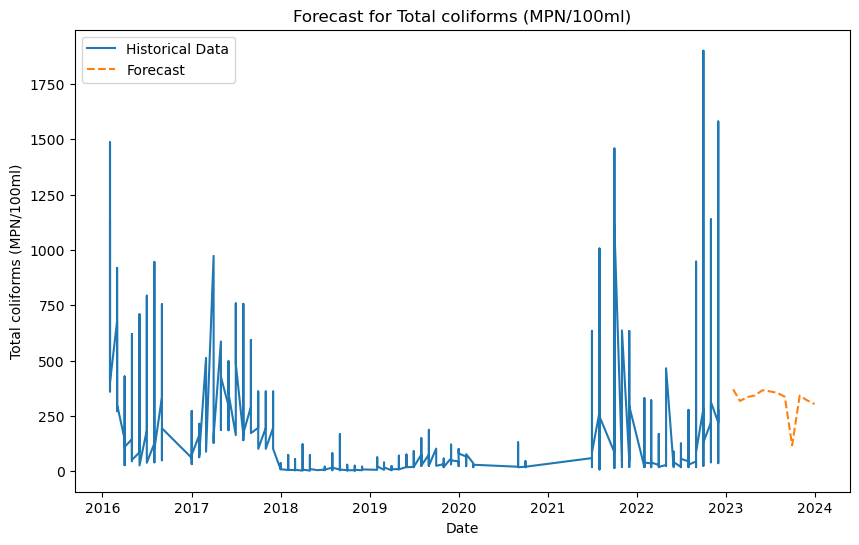

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load dataset
merged_df = pd.read_csv('New_Merged.csv')

# Drop rows with missing values
merged_df.dropna(inplace=True)

# Ensure there's a Date column for time series forecasting
# Assuming 'Year' and 'Month' columns exist
merged_df['Date'] = pd.to_datetime(merged_df[['Year', 'Month']].assign(DAY=1))
merged_df.set_index('Date', inplace=True)

# Define SARIMA parameters
sarima_order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)  # Monthly data with yearly seasonality

# Initialize dictionaries for models and forecasts
models = {}
forecasts = {}

# List of parameters to model
parameters = ['pH (units)', 'Ammonia (mg/L)', 'Nitrate (mg/L)', 'Inorganic Phosphate (mg/L)', 'BOD (mg/l)', 'Dissolved Oxygen (mg/l)', 'Total coliforms (MPN/100ml)']

# Fit SARIMA model and make forecasts
for parameter in parameters:
    try:
        model = SARIMAX(merged_df[parameter], order=sarima_order, seasonal_order=seasonal_order)
        model_fit = model.fit(disp=False)
        forecast = model_fit.forecast(steps=12)  # Forecast 12 months ahead
        models[parameter] = model_fit
        forecasts[parameter] = forecast
    except Exception as e:
        print(f"An error occurred while fitting the model for {parameter}: {e}")

# Print the forecasts
for parameter, forecast in forecasts.items():
    print(f"Forecast for {parameter}:")
    print(forecast)

# Optionally, plot one of the forecasts
for parameter in parameters:
    if parameter in forecasts:
        plt.figure(figsize=(10, 6))
        plt.plot(merged_df.index, merged_df[parameter], label='Historical Data')
        future_dates = pd.date_range(start=merged_df.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
        plt.plot(future_dates, forecasts[parameter], label='Forecast', linestyle='--')
        plt.title(f'Forecast for {parameter}')
        plt.xlabel('Date')
        plt.ylabel(parameter)
        plt.legend()
        plt.show()
